<a href="https://colab.research.google.com/github/qnhhoa/MachineLearning/blob/main/Copy_of_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries và Packages cần thiết

In [3]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

from datetime import date
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
%matplotlib inline

In [4]:
# Kết nối tới Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/nghoanglong/DS102-M11-CNCL/main/data/marketing_data.csv'
SAVING_PATH = '/content/drive/MyDrive/Colab Notebooks/Project'

# Tiền xử lý dữ liệu - Hoàng Long
**Lưu ý:** Sau khi đã chạy các bước tiền xử lý dữ liệu này rồi, data được tiền xử lý sẽ được lưu tại một **SAVING_PATH** cố định, ta chỉ cần load data này lên và xây dựng model, không cần chạy lại các bước tiền xử lý này nữa

## Down and Save Dataset
**Lưu ý:** Nếu chưa down và save dataset, chạy các scripts dưới đây. Nếu đã từng chạy các scripts dưới đây, vui lòng bỏ qua và làm các bước tiếp theo

In [6]:
def fetch_data(download_url=DOWNLOAD_URL, saving_path=SAVING_PATH):
    os.makedirs(saving_path, exist_ok=True)
    tgz_path = os.path.join(saving_path, 'marketing_analytics.csv')
    urllib.request.urlretrieve(download_url, tgz_path)

In [7]:
fetch_data(DOWNLOAD_URL, SAVING_PATH)

## Load data
Đưa dữ liệu vào DataFrame

In [8]:
DATASET_PATH = os.path.join(SAVING_PATH, 'marketing_analytics.csv')

In [9]:
df = pd.read_csv(DATASET_PATH)

In [10]:
# kiểm tra dữ liệu với 5 dòng đầu
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [11]:
# Xem thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Rename Attributes and Cast Type
Ở bước này, ta nhận thấy có một số vấn đề sau với dữ liệu:

*   Tên của các cột chưa được chuẩn hóa (Sai và gây khó hiểu)
*   Kiểu dữ liệu của các cột chưa được tốt

Ta tiến hành đổi tên các cột, và chuyển đổi kiểu dữ liệu như sau



In [12]:
# Rename columns
df.rename(columns={'ID':'User_ID'}, inplace=True)
df.rename(columns={' Income ':'Income'}, inplace=True)
df.rename(columns={'Dt_Customer': 'Date_Enroll'}, inplace = True)
df.rename(columns={'MntMeatProducts': 'MntMeats'}, inplace = True)
df.rename(columns={'MntFishProducts': 'MntFishs'}, inplace = True)
df.rename(columns={'MntSweetProducts': 'MntSweets'}, inplace = True)
df.rename(columns={'MntGoldProds': 'MntGolds'}, inplace = True)

In [13]:
# Cast type to numertical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# Cast type to datetime
df['Date_Enroll'] = pd.to_datetime(df['Date_Enroll'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [14]:
# Kết quả
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_ID              2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Date_Enroll          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeats             2240 non-null   int64         
 12  MntFishs             2240 non-null   int64         
 13  MntSweets            2240 non-nul

## Explory Data Analysis
Phân tích dữ liệu, đưa ra góc nhìn tổng quan về dữ liệu

In [15]:
# Tổng quan thông số dữ liệu
df.describe()

,User_ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFishs,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Xử lý Outliers của các cột dạng Numeric

In [16]:
# Lấy ra những cột dạng numeric trong data
numeric = df.select_dtypes(exclude='object')

In [17]:
cols_to_check = [col for col in numeric.columns[0:18] if col not in ['User_ID', 'Date_Enroll']]
cols_to_check

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeats',
 'MntFishs',
 'MntSweets',
 'MntGolds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

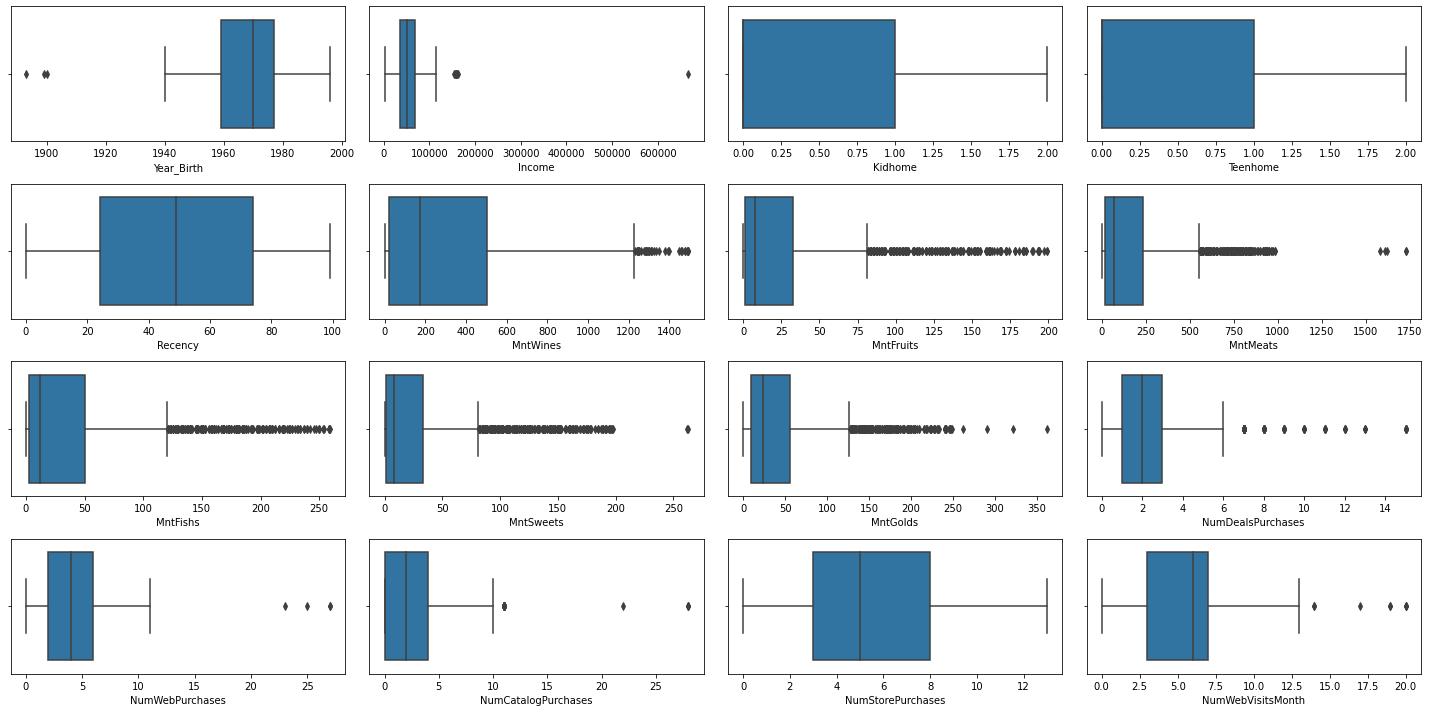

In [18]:
# visualize outliers
fig, ax = plt.subplots(4, 4, figsize = (20, 10))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

Ta thấy đa phần dữ liệu đều có những outliners nhưng dữ liệu tại cột Year_Birth mang những outliners không đúng logic. Tính tại năm hiện tại (2021) thì những người sinh năm <= 1900 đã vượt ngoài 120 tuổi. Ta tiến hành drop hết những người có độ tuổi là dữ liệu lỗi

In [19]:
# drop những người có độ tuổi trên 100 ~ year_birth <= 1900
class HandleOutliners:
    def __init__(self, outliners = True): # no *args or **kargs
        self.outliners = outliners
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        dropped = X.copy()
        if 'Year_Birth' in X.columns:
          dropped = X[numeric["Year_Birth"]>1900].reset_index(drop=True)
        return dropped

### Xử lý dữ liệu Null

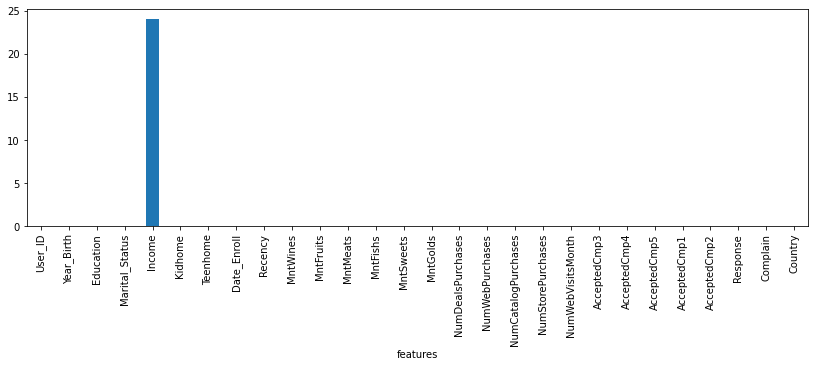

In [20]:
# Plot các cột để kiểm tra Null
missing = df.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing.index = missing['features']
del missing['features']
missing['total_missing'].plot(kind = 'bar', figsize=(14, 4))

In [21]:
# Xử lý dữ liệu Null
class HandlingNullData:
    def __init__(self, handle=True): # no *args or **kargs
        self.handle = handle
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        cp_df = X.copy()
        if 'Income' in X.columns:
          median = cp_df['Income'].median()
          cp_df['Income'].fillna(median, inplace=True)
        return cp_df

Ta thấy cột Income mang giá trị Null, ta tiến hành fill các giá trị mean vào những chỗ có mang giá trị Null này

### Build Pipeline Preprocessing
Ta cần build một pipeline có khả năng xử lý outliners, fill các mean vào những sample mang dữ liệu Null, áp dụng Standard Scaler

In [22]:
# drop cột Date_Enroll
df = df.drop('Date_Enroll', axis=1)

In [23]:
# Combine những thuộc tính cần thiết 
df['Total_Spent'] = df[[col for col in df.columns if 'Mnt' in col]].sum(axis=1)
df['TotalPurchases'] = df[[col for col in df.columns if 'Purchases' in col]].sum(axis=1)
df['TotalCampaignsAcc'] = df[[col for col in df.columns if 'Cmp' in col] + ['Response']].sum(axis=1)

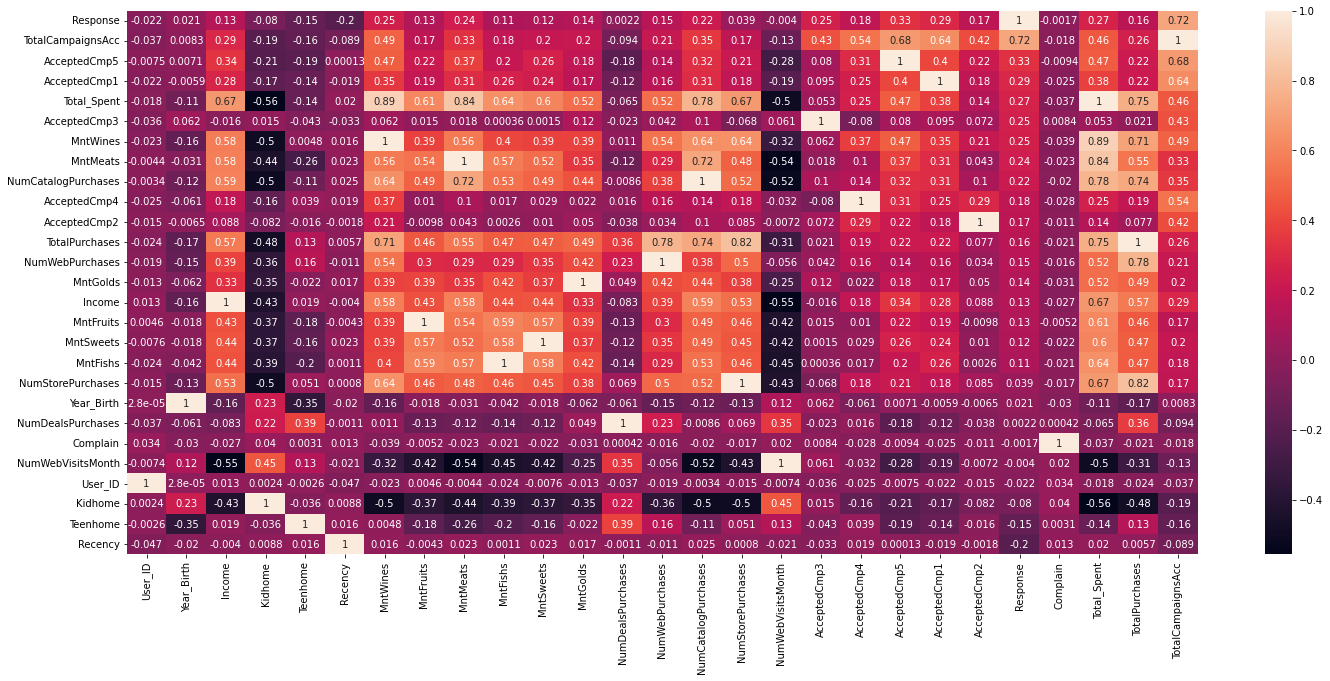

In [24]:
# Xem mối tương quan dữ liệu
plt.figure(figsize=(24,10))
sns.heatmap(df.corr().sort_values(by='Response', ascending=False),annot=True)

Bài toán cần dự đoán nhãn của cột Response, dựa vào biểu đồ tương quan, mức threshold ta cần giữ sẽ >= 0.14

In [25]:
cols_drop = ['Response', 'Income', 'MntFruits', 'MntSweets', 'MntFishs', 'NumStorePurchases', 
             'Year_Birth', 'Complain', 'NumWebVisitsMonth', 'User_ID', 'Kidhome', 'Teenhome', 'Recency']
selected_cols_data = df.drop(cols_drop,axis=1)
y_label = df['Response']

In [26]:
selected_cols_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   MntWines             2240 non-null   int64 
 3   MntMeats             2240 non-null   int64 
 4   MntGolds             2240 non-null   int64 
 5   NumDealsPurchases    2240 non-null   int64 
 6   NumWebPurchases      2240 non-null   int64 
 7   NumCatalogPurchases  2240 non-null   int64 
 8   AcceptedCmp3         2240 non-null   int64 
 9   AcceptedCmp4         2240 non-null   int64 
 10  AcceptedCmp5         2240 non-null   int64 
 11  AcceptedCmp1         2240 non-null   int64 
 12  AcceptedCmp2         2240 non-null   int64 
 13  Country              2240 non-null   object
 14  Total_Spent          2240 non-null   int64 
 15  TotalPurchases       2240 non-null   int64 
 16  TotalC

In [27]:
# Lấy ra list những categorical columns
cate_cols = list(selected_cols_data.select_dtypes(include='object'))
cate_cols

['Education', 'Marital_Status', 'Country']

In [28]:
# Lấy ra list những columns ở dạng number
num_cols = list(col for col in selected_cols_data.select_dtypes(exclude='object'))
num_cols

['MntWines',
 'MntMeats',
 'MntGolds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Total_Spent',
 'TotalPurchases',
 'TotalCampaignsAcc']

In [29]:
clean_data = Pipeline([
    ('outliners', HandleOutliners()),
    ('null', HandlingNullData()),
])

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

transform_cols = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cate_cols),
], remainder='passthrough')

full_pipeline = Pipeline([
    ('clean_data', clean_data),
    ('transform_cols', transform_cols),
])

In [30]:
X = full_pipeline.fit_transform(selected_cols_data)

In [31]:
print(f'input shape = {X.shape}')
print(f'label shape = {y_label.shape}')

input shape = (2240, 35)
label shape = (2240,)


### Lưu dữ liệu đã được xử lý

In [32]:
# Lưu input đầu vào
np.save(os.path.join(SAVING_PATH, 'input_data.npy'), X)

In [33]:
# Lưu label
np.save(os.path.join(SAVING_PATH, 'label.npy'), y_label)

# Xây dựng model - Quỳnh Hoa, Hoàng Long

In [34]:
input = np.load(os.path.join(SAVING_PATH, 'input_data.npy'))

In [35]:
input.shape

(2240, 35)

In [36]:
y = np.load(os.path.join(SAVING_PATH, 'label.npy'))

In [37]:
y.shape

(2240,)

## Logistic regression

### Chọn tham số tối ưu

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
parameters = [{'C':[0.001, 0.01, 0.1, 1.0, 10.0], 
               'solver':['sag', 'liblinear', 'lbfgs']}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)

In [39]:
grid_search.fit(input, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'solver': ['sag', 'liblinear', 'lbfgs']}],
             scoring='accuracy')

In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.0174334 , 0.00459019, 0.01021592, 0.01731928, 0.00545597,
        0.01206779, 0.04679219, 0.00684857, 0.01709541, 0.12020445,
        0.00930532, 0.02158237, 0.12224801, 0.00952888, 0.02733699]),
 'mean_score_time': array([0.00290608, 0.0006183 , 0.00068315, 0.0007476 , 0.00081738,
        0.00074553, 0.00081658, 0.00064484, 0.00066845, 0.0008293 ,
        0.00109871, 0.00071303, 0.00083351, 0.00070437, 0.0006818 ]),
 'mean_test_score': array([0.86607556, 0.88437575, 0.86607556, 0.9116107 , 0.92098331,
        0.9116107 , 0.99598334, 0.99821448, 0.99598334, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1,
                    1.0, 1.0, 1.0, 10.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype

### Train and Evaluate

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

skfolds = StratifiedKFold(n_splits=3, random_state=1712, shuffle=True)
logreg = LogisticRegression(C=0.01, solver='liblinear', random_state=1711)
accuracy_lr = []; precision_lr = []; recall_lr = []; f1_lr = []

for train_index, test_index in skfolds.split(input, y):
    X_train_folds = input[train_index]
    y_train_folds = y[train_index]
    X_test_fold = input[test_index]
    y_test_fold = y[test_index]
    logreg.fit(X_train_folds, y_train_folds)
    y_pred = logreg.predict(X_test_fold)
    accuracy_lr.append(accuracy_score(y_test_fold, y_pred))
    precision_lr.append(precision_score(y_test_fold, y_pred))
    recall_lr.append(recall_score(y_test_fold, y_pred))
    f1_lr.append(f1_score(y_test_fold, y_pred))

In [42]:
print(f'accuracy = {np.mean(accuracy_lr)}')
print(f'precision = {np.mean(precision_lr)}')
print(f'recall = {np.mean(recall_lr)}')
print(f'f1 = {np.mean(f1_lr)}')

accuracy = 0.9218763645586217
precision = 0.8918283362727807
recall = 0.5478067353067354
f1 = 0.6766323228713795


## Decision tree

### Chọn tham số tối ưu

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier()
parameters = [{'criterion':['gini', 'entropy'], 'max_depth':[1, 2, 3, 4, 5, 6]}]

grid_search = GridSearchCV(estimator = clf_gini,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)

In [44]:
grid_search.fit(input, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6]}],
             scoring='accuracy')

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.00275254, 0.00199906, 0.00225329, 0.00375311, 0.00273299,
        0.00285673, 0.00193461, 0.00229597, 0.00276478, 0.00321635,
        0.00358081, 0.00375319]),
 'mean_score_time': array([0.00069372, 0.00043766, 0.00045307, 0.00088366, 0.0004518 ,
        0.00044616, 0.00044664, 0.00046396, 0.00046396, 0.00046571,
        0.00049829, 0.00048415]),
 'mean_test_score': array([0.87722591, 0.91205453, 0.90312157, 0.93213306, 0.95267636,
        0.96160513, 0.87722591, 0.91205453, 0.9035684 , 0.9392811 ,
        0.95044402, 0.96383628]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 1, 2, 3

### Train and evaluate

In [46]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

skfolds = StratifiedKFold(n_splits=3, random_state=1712, shuffle=True)
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1711)
accuracy_dt = []; precision_dt = []; recall_dt = []; f1_dt = []

for train_index, test_index in skfolds.split(input, y):
    X_train_folds = input[train_index]
    y_train_folds = y[train_index]
    X_test_fold = input[test_index]
    y_test_fold = y[test_index]
    clf_gini.fit(X_train_folds, y_train_folds)
    y_pred = clf_gini.predict(X_test_fold)
    accuracy_dt.append(accuracy_score(y_test_fold, y_pred))
    precision_dt.append(precision_score(y_test_fold, y_pred))
    recall_dt.append(recall_score(y_test_fold, y_pred))
    f1_dt.append(f1_score(y_test_fold, y_pred))

In [47]:
print(f'accuracy = {np.mean(accuracy_dt)}')
print(f'precision = {np.mean(precision_dt)}')
print(f'recall = {np.mean(recall_dt)}')
print(f'f1 = {np.mean(f1_dt)}')

accuracy = 0.9763450585182554
precision = 0.9265922249793217
recall = 0.9159427284427285
f1 = 0.9171204636940189


## XGBoost

### Chọn tham số tối ưu

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model_xgb= XGBClassifier()
parameters = {'n_estimators':[10, 20, 30, 40, 50, 100, 200],'max_depth':[3, 4, 5, 6],'learning_rate':[0.001, 0.01, 0.1, 0.01]}
model_xgb_grid = GridSearchCV(model_xgb, 
                              parameters,
                              cv=3,
                              verbose=0)

In [ ]:
model_xgb_grid.fit(input, y)

In [ ]:
model_xgb_grid.cv_results_

In [ ]:
model_xgb_grid.best_params_

### Train and evaluate

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

skfolds = StratifiedKFold(n_splits=3, random_state=1712, shuffle=True)
xgb_classifier = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=1711)
accuracy_xgb = []; precision_xgb = []; recall_xgb = []; f1_xgb = []

for train_index, test_index in skfolds.split(input, y):
    X_train_folds = input[train_index]
    y_train_folds = y[train_index]
    X_test_fold = input[test_index]
    y_test_fold = y[test_index]
    xgb_classifier.fit(X_train_folds, y_train_folds)
    y_pred = xgb_classifier.predict(X_test_fold)
    accuracy_xgb.append(accuracy_score(y_test_fold, y_pred))
    precision_xgb.append(precision_score(y_test_fold, y_pred))
    recall_xgb.append(recall_score(y_test_fold, y_pred))
    f1_xgb.append(f1_score(y_test_fold, y_pred))

In [ ]:
print(f'accuracy = {np.mean(accuracy_xgb)}')
print(f'precision = {np.mean(precision_xgb)}')
print(f'recall = {np.mean(recall_xgb)}')
print(f'f1 = {np.mean(f1_xgb)}')